In [1]:
import numpy as np
import matplotlib.pyplot as plt

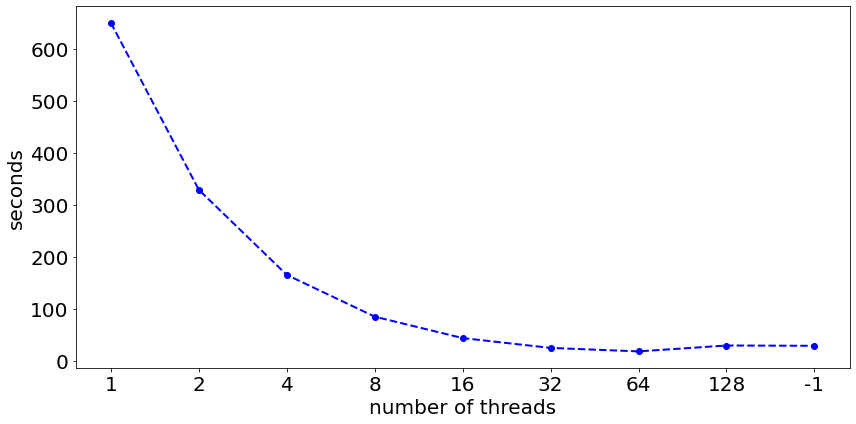

In [15]:
dicc = {}
number = 2**8
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_SyntheticData/time_dtwParallel_dep.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values = []
keys = n_threads
for i in range(len(keys)):
    values.append(np.mean(dicc[keys[i]]))
    
fig, axis = plt.subplots(1,1,figsize=(12,6))

axis.plot(values,'bo--',linewidth=2,alpha=1)

keys_finales = list(map(str, n_threads)) 
plt.xticks(np.arange(len(n_threads)), keys_finales, fontsize=20)
plt.yticks(fontsize=20)
axis.set_xlabel('number of threads',fontsize=20) 
axis.set_ylabel('seconds',fontsize=20) 
plt.tight_layout()
#plt.savefig("../Figures/dtwParallel_dtw_D.png")

In [6]:
data = np.loadtxt('../results_E1_SyntheticData/dtw.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtw_value = np.mean(a)

In [7]:
data = np.loadtxt('../results_E1_SyntheticData/fastdtw.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
fastdtw_value = np.mean(a)

In [8]:
data = np.loadtxt('../results_E1_SyntheticData/dtaidistance.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtaidistance_value = np.mean(a)

In [9]:
values = [dtw_value, fastdtw_value, dtaidistance_value, np.mean(dicc[64])]

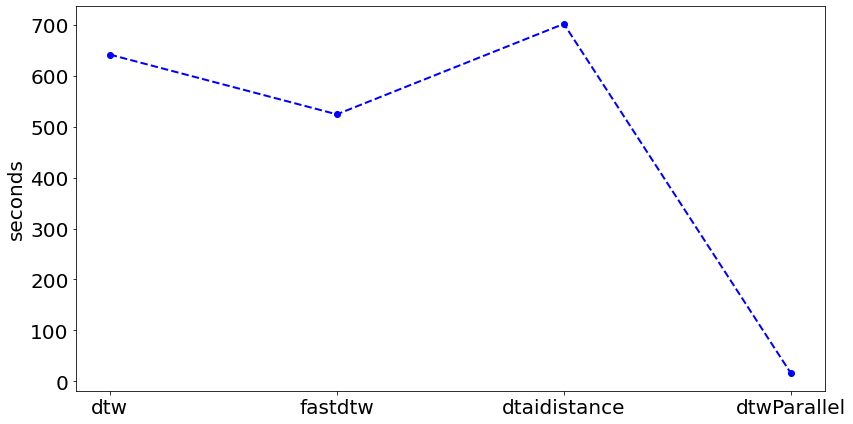

In [10]:
fig,axis = plt.subplots(1,1,figsize=(12,6))

axis.plot(values,'bo--',linewidth=2,alpha=1)

keys_finales = ['dtw', 'fastdtw', 'dtaidistance', 'dtwParallel'] 
plt.xticks(np.arange(4), keys_finales, fontsize=20)
plt.yticks(fontsize=20)
axis.set_ylabel('seconds',fontsize=20) 
plt.tight_layout()
plt.savefig("../Figures/comparativeTime.png")

## dtw independiente

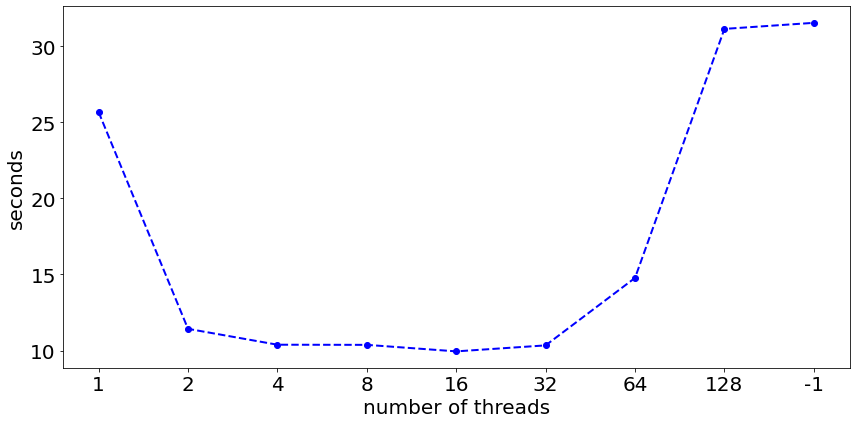

In [16]:
dicc = {}
number = 2**8
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_SyntheticData/time_dtwParallel_ind.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values = []
keys = n_threads
for i in range(len(keys)):
    values.append(np.mean(dicc[keys[i]]))
    
fig, axis = plt.subplots(1,1,figsize=(12,6))

axis.plot(values,'bo--',linewidth=2,alpha=1)

keys_finales = list(map(str, n_threads)) 
plt.xticks(np.arange(len(n_threads)), keys_finales, fontsize=20)
plt.yticks(fontsize=20)
axis.set_xlabel('number of threads',fontsize=20) 
axis.set_ylabel('seconds',fontsize=20) 
plt.tight_layout()
#plt.savefig("../Figures/dtwParallel_dtw_I.png")